# 유방암 차원축소

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [5]:
cancer.data.shape

(569, 30)

In [6]:
#10차원
from sklearn.decomposition import PCA
pca10 = PCA(10)
cancer_pca10 = pca10.fit_transform(cancer.data)

In [7]:
pca10.explained_variance_ratio_, pca10.explained_variance_ratio_.sum()

(array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
        8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
        3.44135279e-07, 1.86018721e-07]), 0.9999998946838408)

In [8]:
from sklearn.decomposition import PCA
#5차원
pca5 = PCA(5)
cancer_pca5 = pca5.fit_transform(cancer.data)
pca5.explained_variance_ratio_, pca5.explained_variance_ratio_.sum()

(array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
        8.82724536e-05]), 0.9999878765363122)

In [9]:
from sklearn.decomposition import PCA
#2차원
pca2 = PCA(2)
cancer_pca2 = pca2.fit_transform(cancer.data)
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.98204467, 0.01617649]), 0.9982211613741724)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9790209790209791

In [11]:
def pca_accuracy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, stratify=y, random_state=2022
  )
  rfc = RandomForestClassifier(random_state=2022)
  rfc.fit(X_train,y_train)
  score =  rfc.score(X_test,y_test)
  return score

In [16]:
for n in [2,5,10]:
  pca = PCA(n_components=n)
  cancer_pca = pca.fit_transform(cancer.data)
  explained = pca.explained_variance_ratio_.sum()
  acc = pca_accuracy(cancer_pca,cancer.target)
  print(f'PCA{n}: 설명력-{explained:.4f},정확도-{acc:.4f}')
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
print(f'원본:{rfc.score(X_test,y_test)}')


PCA2: 설명력-0.9982,정확도-0.9231
PCA5: 설명력-1.0000,정확도-0.9650
PCA10: 설명력-1.0000,정확도-0.9720
원본:0.9790209790209791


### 시각화

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2022)
kmeans.fit(cancer.data)

KMeans(n_clusters=2, random_state=2022)

In [30]:
df = pd.DataFrame({
    'PC1':cancer_pca2[:,0], 'PC2':cancer_pca2[:,1],
    'target':cancer.target,  'cluster':kmeans.labels_
})
df.head()

,PC1,PC2,target,cluster
0,1160.142574,-293.917544,0,1
1,1269.122443,15.630182,0,1
2,995.793889,39.156743,0,1
3,-407.180803,-67.380320,0,0
4,930.341180,189.340742,0,1


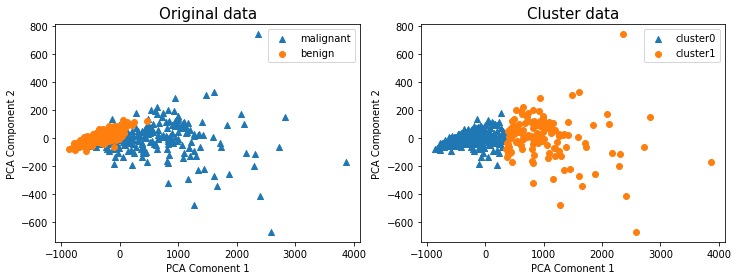

In [42]:

markers = ['^','o']
#PC1, PC2 시각화(품종별로 마커의 색과 모양 다르게 표현)
plt.figure(figsize = (12,4))
for k, column in enumerate(['target','cluster']):
  plt.subplot(1,2,k+1)
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column] == i]['PC2']
    if k == 0 :
      plt.title('Original data', fontsize=15)
      plt.scatter(x_data,y_data,marker=marker,label=cancer.target_names[i])
    else:
      plt.title('Cluster data', fontsize=15)
      plt.scatter(x_data,y_data,marker=marker,label='cluster'+str(i))
  plt.legend()
  plt.xlabel("PCA Comonent 1"), plt.ylabel("PCA Component 2")
plt.show()

In [46]:
!jupyter nbconvert --to html /content/drive/MyDrive/machine/0427/과제/문석찬2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/machine/0427/과제/문석찬2.ipynb to html
[NbConvertApp] Writing 341569 bytes to /content/drive/MyDrive/machine/0427/과제/문석찬2.html
